# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [144]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [145]:
# Carregar a base de dados
df = pd.read_csv('sinasc_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [146]:
# Verificar os valores possíveis para a variável APGAR5
df.APGAR5.value_counts()

9.0     16076
10.0     8393
8.0      1994
7.0       241
6.0        79
5.0        45
1.0        24
4.0        23
2.0        18
0.0        17
3.0        15
Name: APGAR5, dtype: int64

In [147]:
# Categorizar a variável - APGAR5_cat
df.loc[df['APGAR5'] <= 3, 'APGAR5_cat'] = 'asfixia grave'
df.loc[(df['APGAR5'] == 4) | (df['APGAR5'] == 5), 'APGAR5_cat'] = 'asfixia moderada'
df.loc[(df['APGAR5'] == 6) | (df['APGAR5'] == 7), 'APGAR5_cat'] = 'asfixia leve'
df.loc[(df['APGAR5'] == 8) | (df['APGAR5'] == 9) | (df['APGAR5'] == 10), 'APGAR5_cat'] = 'normal'

In [148]:
df['APGAR5_cat'].value_counts()

normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: APGAR5_cat, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [149]:
# Verificar os grupos de tempo de gestação
df.GESTACAO.value_counts()

37 a 41 semanas        22589
32 a 36 semanas         2249
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
Menos de 22 semanas        7
Name: GESTACAO, dtype: int64

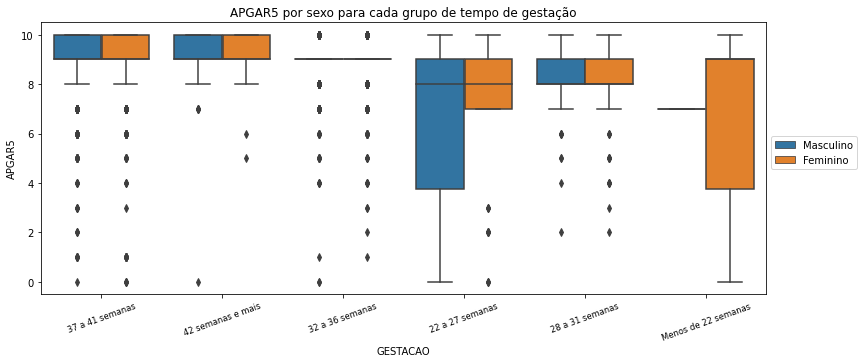

In [150]:
fig, ax = plt.subplots(figsize = (13, 5))

sns.boxplot(ax = ax, x = 'GESTACAO', y = 'APGAR5', hue = 'SEXO', orient = 'v', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 20, fontsize = 'small')
ax.set_title('APGAR5 por sexo para cada grupo de tempo de gestação')
plt.legend(bbox_to_anchor = (1.0, 0.6))

plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [151]:
tabela = pd.crosstab(df['APGAR5_cat'], df['GESTACAO'])
tabela

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5_cat,,,,,,
asfixia grave,21,3,8,33,1,2
asfixia leve,12,18,73,196,6,1
asfixia moderada,1,12,19,28,1,0
normal,51,129,2134,22266,690,4


####  5) Da tabela cruzada do item anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [152]:
tabela_pctlin = tabela.div(tabela.sum(axis = 1), axis = 0)
tabela_pctlin

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5_cat,,,,,,
asfixia grave,0.308824,0.044118,0.117647,0.485294,0.014706,0.029412
asfixia leve,0.039216,0.058824,0.238562,0.640523,0.019608,0.003268
asfixia moderada,0.016393,0.196721,0.311475,0.459016,0.016393,0.000000
normal,0.002018,0.005104,0.084435,0.880984,0.027301,0.000158


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

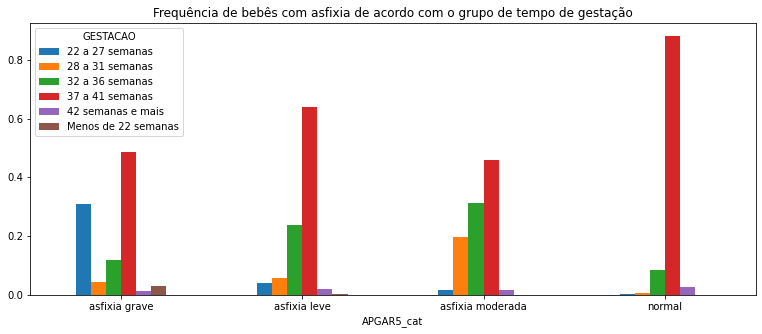

In [154]:
plt.close('all')

fig, ax = plt.subplots(figsize = (13, 5))
tabela_pctlin.plot.bar(ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 10)
ax.set_title('Frequência de bebês com asfixia de acordo com o grupo de tempo de gestação')

plt.show()

A partir da observação do gráfico, pode-se notar que os casos de asfixia, em todos os seus níveis, são mais frequentes em bebês entre 37 a 41 semanas de vida. Embora os casos de asfixia sejam muito mais recorrentes em bebês com menos de 37 semanas em comparação com os de 42 semanas ou mais, não podemos afirmar com alta probabilidade que partos com menos de 37 semanas são prematuros, pois, pelo menos nessa base de dados, as ocorrências de asfixia também são significativamente comuns nos partos com mais de 37 semanas. **Logo, o conjunto de dados apresentado não corrobora de forma considerável com a afirmação dos médicos.**

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

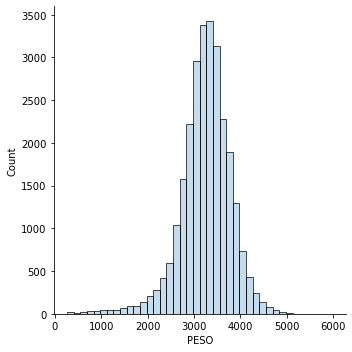

In [155]:
# Verificar a distribuição da variável peso do bebê
sns.displot(data = df, x = 'PESO', alpha = .25, bins = 40);

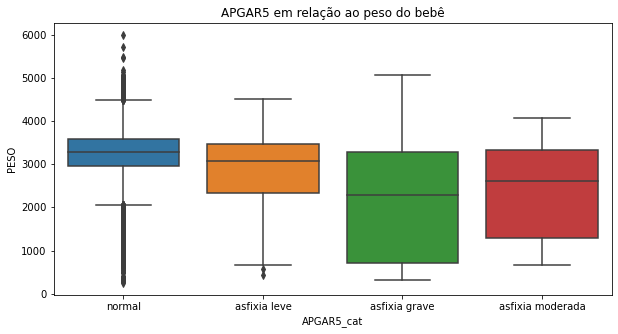

In [156]:
plt.close('all')

fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(data = df, x = 'APGAR5_cat', y = 'PESO')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 10)
ax.set_title('APGAR5 em relação ao peso do bebê')

plt.show()

Podemos afirmar que há associação entre o peso do bebê e o APGAR 5. Para o nível **"normal"**, os pesos dos bebês estão concentrados entre 3 e 4 kg. Já no caso de **"asfixia grave"**, os pesos estão largamente distribuídos e são menos concentrados. Para cada nível, a distribuição do peso é distinta. Logo, o grau de asfixia (ou não) do bebê relaciona-se com seu peso.